# Programming for Data Analysis 
## Student Name: Sam Tracey
## Student ID: G00398245
## November 2021

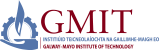
***

# The NumPy Random Package.

[Official Numpy Documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

<br>

## What is NumPy?

***

NumPy, which stands for Numerical Python, is an open sourced Python library. Created in 2005 by Travis E. Oliphant NumPy combined the features of two older Python packages:<br>
Numeric and Numarray ([1](https://www.nature.com/articles/s41586-020-2649-2)). Today NumPy is considered the universal standard for working with numerial data in Python and is
extensively used in engineering and science ([2](https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54))<br>
<br>
A key feature of NumPy is its N-Dimensional Array (ndarray) object. ([3](https://numpy.org/doc/stable/user/whatisnumpy.html)) Inherently, Python has lists which serve the purpose of an array however, these are slow to process due to the fact that a Python list is actually made up of pointers referencing an object in memory. ([4](https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65)) A NumPy array on the other hand is a collection of similar data-types stored in one continuous place in memory. To see how much faster a NumPy array is when compared to a Python list we can run the code below in which we create a list of one million elements and a NumPy array of one million elements.<br> We then calculate how long it takes to perform a simple mathematical operation on each element. In this example, NumPy performs the
operation approximately 65 times faster.


In [1]:
# Import NumPy package
import numpy as np

# create a Numpy array.
numpy_arr = np.arange(1000000)

# create a python list.
python_list = list(range(1000000))

# print out execution time for raising each element in the array to the power of 2.
print("NumPy Processing Time")
%time for i in range(10): numpy_arr = numpy_arr ** 2
 
# print out execution time for raising each element in the array to the power of 2.
print("List Processing Time")
%time for i in range(10): python_list2 = [x ** 2 for x in python_list]

NumPy Processing Time
Wall time: 25.6 ms
List Processing Time
Wall time: 2.62 s


<br>

Some key aspects of the ndarray are:
- They are homogenous. All items in an ndarray must be of the same type.
- The number of dimensions of an ndarray is defined by the ndarray shape.
- A separate data-type object (dtype) specifies the type of items in the ndarray.
- The size attribute indicates the total number of elements in the ndarray.


<br>

## The numpy.random package.

***

The numpy.random module provides the user with the ability to generate full arrays of pseudo-random numbers of specified shapes. It is considered supplemental to Python's built-in *random* module which only samples one value at a time.[5]<br>

A pseudo-random number is a mathematically generated sequence of nearly random numbers. All software pseudo-random generators (including numpy.random) work in fundamentally the<br> same way: *"They start with a random number, known as the seed, and then use an algorithm to generate a pseudo-random sequence of bits based on it."* ([6](https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom?redirectedfrom=MSDN))<br> We will cover pseudo-random numbers and seeds in a later section.<br>

The numpy.random package enables us to create arrays based on known statistical distributions which is of huge significance in the Data Science community. Rather than having to collect data from an experiment or trial, data scientists can generate data using the numpy.random package to evaluate different hypotheses.  

<br>

## Simple Random Data

***

The numpy.random package provides several functions for generating simple random data:


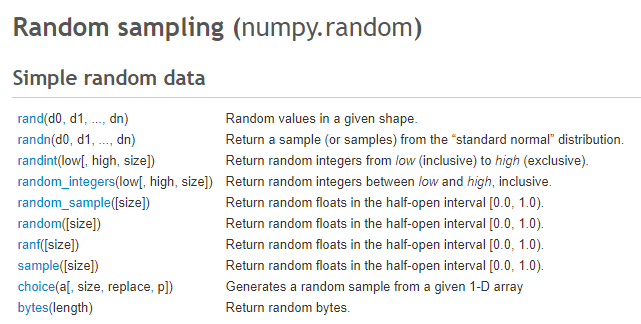

In this section we are going to discuss each of these functions and investigate how they can be used.

***

### numpy.random.rand

The numpy.random.rand function returns a Numpy array containing numbers drawn from the standard uniform distribution between the values of 0 and 1. A uniform distribution in statistics is a probability distribution in which all outcomes are equally as likely.([7](https://www.britannica.com/topic/uniform-distribution-statistics))
 

In [18]:
# create a one dimensional array with 10 elements.
x = np.random.rand(10)
# Show array contents and attributes of the array.
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)


[0.725891   0.29726462 0.33705019 0.63743531 0.73548984 0.05326499
 0.37515609 0.52002706 0.37761754 0.5323186 ]
The number of dimensions in the array =  1
The shape of the array =  (10,)
The number of elements in the array =  10


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

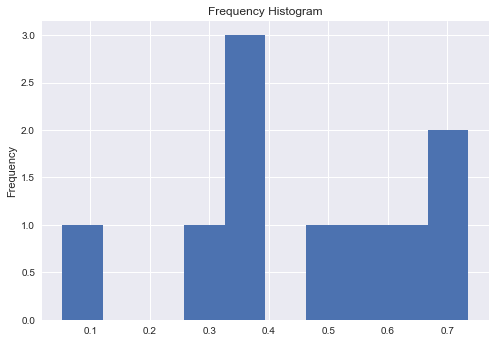

In [19]:
# import charting library.
import matplotlib.pyplot as plt
# Define the style to be used.
plt.style.use('seaborn')
# Create the histogram with 10 bins.
plt.hist(x, bins=10)
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

<br>
Our array (x) has 1 dimension, 10 elements and a shape of (10,). The distribution of the data in the histogram should be uniform - i.e the probability of getting each value should be the same however, with a small sample size (10 values) this may not be apparent. Let's try the same thing with a much larger number of samples:

In [24]:
# create a one dimensional array with 1000000 elements.
y = np.random.rand(1000000)
# Show array contents and attributes of the array.
print(y)
print("The number of dimensions in the array = ", y.ndim)
print("The shape of the array = ", y.shape)
print("The number of elements in the array = ", y.size)

[0.72351954 0.18905837 0.6080464  ... 0.06047597 0.47634451 0.48780991]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

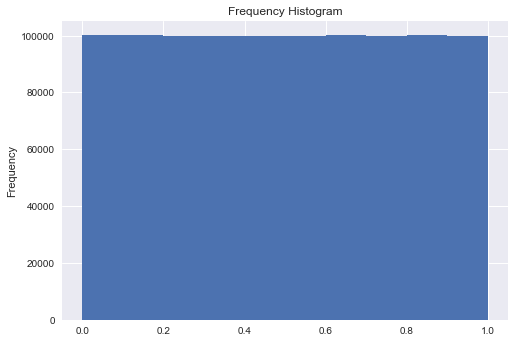

In [25]:
# Create the histogram with 10 bins.
plt.hist(y, bins=10)
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

<br>

With a sample size of one million elements we now see that our random data is more closley approximating the uniform distribution.


In the above example we created a one dimensional Numpy array. We can also create multi-dimensional arrays.

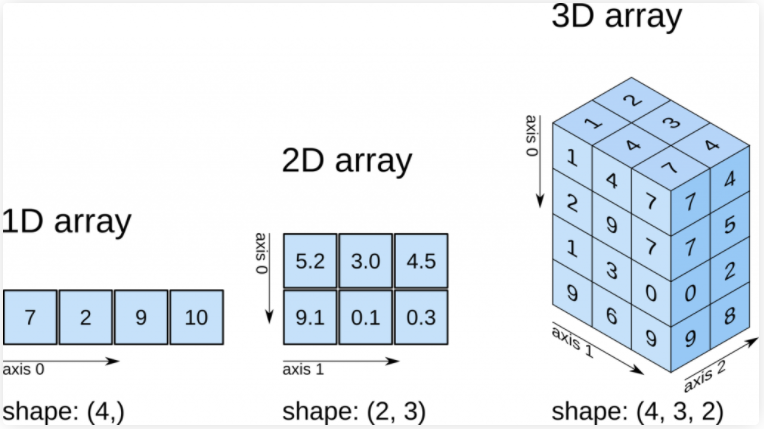

In [27]:
# Generating a two dimensional array
x = np.random.rand(2, 5)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)

[[0.88295642 0.01402044 0.30202637 0.7267782  0.67465964]
 [0.20809253 0.44395711 0.39146125 0.37408785 0.19941639]]
The number of dimensions in the array =  2
The shape of the array =  (2, 5)
The number of elements in the array =  10


In [28]:
# Generating a three dimensional array
x = np.random.rand(2, 3, 5)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)

[[[0.04998754 0.57423136 0.06717551 0.16158428 0.888395  ]
  [0.92721339 0.93654392 0.02332807 0.42615906 0.76085739]
  [0.03995627 0.77524293 0.47138494 0.03079381 0.47488914]]

 [[0.30435041 0.67593342 0.49776195 0.62317833 0.96507919]
  [0.84779548 0.31173792 0.13980836 0.5540024  0.39769735]
  [0.01715255 0.00635946 0.9495297  0.74382316 0.53091142]]]
The number of dimensions in the array =  3
The shape of the array =  (2, 3, 5)
The number of elements in the array =  30


In [2]:
# Efficient numerical arrays
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

In [3]:
# Change default style sheet [3]
plt.style.use('seaborn')
# change the default figure size [2]
plt.rcParams['figure.figsize'] = [10, 5]
 

## Random Number Generation (Distributions)

[Documentation](https://numpy.org/doc/1.21/reference/random/generator.html)

In [14]:
# Generate an array of 10000 value between -1 (lower Bound) Inclusively and 0(Upper Bound) Exclusively.
s = np.random.default_rng().uniform(-1,0,1000)
s

array([-0.22000418, -0.09748557, -0.40500665, -0.89682194, -0.1537628 ,
       -0.80492594, -0.74844604, -0.48106003, -0.19055194, -0.12374876,
       -0.95884813, -0.47294957, -0.72048424, -0.54185795, -0.77184671,
       -0.75645445, -0.99268751, -0.23812375, -0.58782662, -0.17222776,
       -0.96494801, -0.33620927, -0.37498891, -0.53414085, -0.4514488 ,
       -0.82957981, -0.05961435, -0.35628976, -0.75343988, -0.51583636,
       -0.98663791, -0.78485558, -0.05443904, -0.21496602, -0.36997837,
       -0.48968098, -0.8005887 , -0.31349422, -0.29299649, -0.2134092 ,
       -0.59528603, -0.25449775, -0.1751527 , -0.19021982, -0.07081782,
       -0.064045  , -0.10367502, -0.20266852, -0.61282191, -0.57317484,
       -0.36827358, -0.14252548, -0.77321799, -0.6975265 , -0.45466494,
       -0.78473   , -0.20651726, -0.64782252, -0.41648767, -0.27666293,
       -0.53563404, -0.1931743 , -0.22799089, -0.73972278, -0.54504217,
       -0.74097583, -0.98680284, -0.36156893, -0.51283241, -0.49

(array([103., 103., 106., 105.,  90., 104.,  90., 103., 107.,  89.]),
 array([-0.99961508, -0.8997615 , -0.79990791, -0.70005432, -0.60020073,
        -0.50034714, -0.40049355, -0.30063996, -0.20078638, -0.10093279,
        -0.0010792 ]),
 <BarContainer object of 10 artists>)

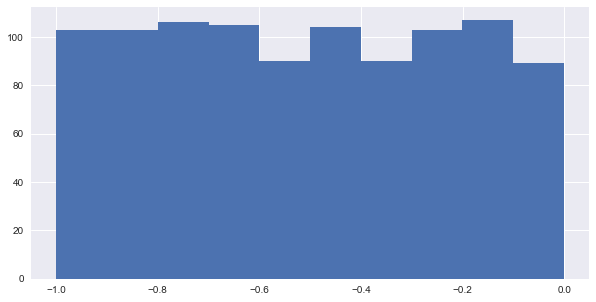

In [18]:
plt.hist(s)

In [26]:
mu, sigma = 180, 15 # mean and standard deviation
norm = np.random.default_rng().normal(mu, sigma, 10000)
norm

array([174.71542054, 175.30882352, 182.77244725, ..., 185.92149718,
       188.83934512, 207.83796719])

(array([   9.,  100.,  625., 1816., 3046., 2680., 1308.,  365.,   47.,
           4.]),
 array([121.8567963 , 133.95314893, 146.04950156, 158.14585419,
        170.24220681, 182.33855944, 194.43491207, 206.5312647 ,
        218.62761733, 230.72396996, 242.82032258]),
 <BarContainer object of 10 artists>)

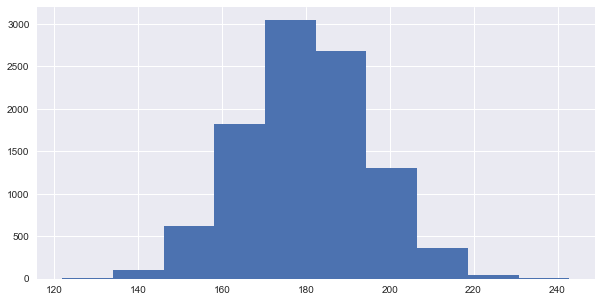

In [27]:
plt.hist(norm)

Task from video: Understand how the new seed algorithm (PCG64) out performs the previous seed algorithm.

## References

[1] Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). Available at:https://doi.org/10.1038/s41586-020-2649-2<br>
    accessed 24th October 2021<br>
[2] Bonner, A. The Ultimate Beginner’s Guide to NumPy. Towards Data Science (2019). Available at: https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54 <br> accessed 24th October 2021<br>
[3] numpy.org What is NumPy? 2021. Available at: https://numpy.org/doc/stable/user/whatisnumpy.html accessed 24th October 2021<br>
[4] Gough, C. Performance of Numpy Array vs Python List (2019). Available at: https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65 accessed 24th October 2021.<br>
[5] McKinney, M. Python for Data Analysis. 120-124 (2018).<br>
[6] Micorsoft (2021). CryptGenRandom function (wincrypt.h). Available at:https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom?redirectedfrom=MSDN accessed 24th October 2021.<br>
[7] Hosch, L. W, Britannica. Uniform Distribution. Available at: https://www.britannica.com/topic/uniform-distribution-statistics accessed 31st October 2021.

***

## End